<h1>Titanic Tutorial - EDA, Visualization, Machine Learning </h1>

* Titanic 데이터를 통해 기초적인 데이터 분석, 시각화, 머신러닝 기법을 공부하는 커널입니다.
* 이 컴페티션의 목표는 주어진 Titanic 승객 데이터로부터 승객의 생존 여부를 예측하는 것입니다.

<br>

## Index
1. Dataset 확인<br>
2. Exploratory data analysis


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<진행해야 할 프로세스>

1. 데이터셋 확인 : null data 확인 및 수정.
2. EDA : 여러 feature를 개별적으로 분석, feature들 간의 상관관계 확인. 여러 시각화 툴을 이용해 insight를 얻음.
3. feature engineering : 모델 성능을 높일 수 있도록 feature들을 손봄. 원핫인코딩, 비닝, 텍스트 데이터 처리 등.
4. 모델 만들기 : sklearn을 사용해 모델을 만듦.
5. 모델 학습 및 예측 : trainset을 가지고 모델 학습 후 testset을 가지고 prediction을 함.
6. 모델 평가 : 예측성능이 원하는 수준인지 판단. 풀려는 문제에 따라 모델 평가 방식도 달라짐

<br>

---

<br>

# 1. Dataset 확인

* 파이썬은 테이블화 된 데이터를 다루는 데 최적화됨. (pandas)

In [3]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 우리가 다루는 문제에서 feature는 Pcalss, SibSp, Parch, Fare이며 target label은 Survived임.

 * Survived : 생존여부. 이진변수.
 * Pclass : 티켓의 클래스. 1, 2, 3으로 나뉘는 범주형 변수.
 * Sex : 성별. 이진변수.
 * Age : 나이. 연속형 변수.
 * SibSp : 함께 탑승한 형제와 배우자의 수. 양적변수.
 * Parch : 함께 탑승한 부모, 아이의 수. 양적변수.
 * Ticket : 티켓번호. alphabet + integer.
 * Fare : 탑승료. 연속형 변수.
 * Cabin : 객실 번호. alphabet + integer.
 * Embared : 탑승 항구. C(Cherbourg), Q(Queenstown), S(Southampton).

* describe() 메소드는 각 feature의 통계치를 보여줌.

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* PassengerId의 count와 갯수가 다른 feature가 존재함을 확인할 수 있음. 즉 null data가 존재함.
 
<br>

---

<br>

## 1.1 Null data check

In [6]:
print("==TrainSet의 feature별 NaN 비율==")
for col in df_train.columns:
    msg = "{:>14} \t {:>5.2f}%".format(col, (df_train[col].isnull().sum() / df_train[col].shape[0]) * 100)
    print(msg)

print("\n==TestSet의 feature별 NaN 비율==")
for col in df_test.columns:
    msg = "{:>14} \t {:>5.2f}%".format(col, (df_test[col].isnull().sum() / df_test[col].shape[0]) * 100)
    print(msg)

==TrainSet의 feature별 NaN 비율==
   PassengerId 	  0.00%
      Survived 	  0.00%
        Pclass 	  0.00%
          Name 	  0.00%
           Sex 	  0.00%
           Age 	 19.87%
         SibSp 	  0.00%
         Parch 	  0.00%
        Ticket 	  0.00%
          Fare 	  0.00%
         Cabin 	 77.10%
      Embarked 	  0.22%

==TestSet의 feature별 NaN 비율==
   PassengerId 	  0.00%
        Pclass 	  0.00%
          Name 	  0.00%
           Sex 	  0.00%
           Age 	 20.57%
         SibSp 	  0.00%
         Parch 	  0.00%
        Ticket 	  0.00%
          Fare 	  0.24%
         Cabin 	 78.23%
      Embarked 	  0.00%


* Train, Test 둘다 Age, Cabin에서 Null data가 존재함을 확인할 수 있음.
* Missingno 라이브러리를 사용하면 Null data의 존재를 더 쉽게 볼 수 있음.

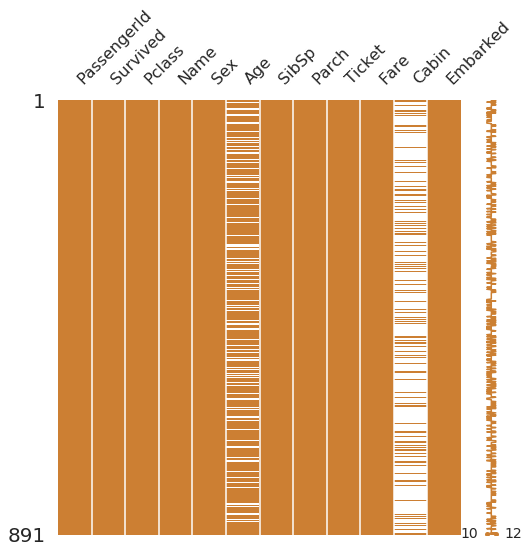

In [7]:
msno.matrix(df=df_train, figsize=(8,8), color=(0.8,0.5,0.2))

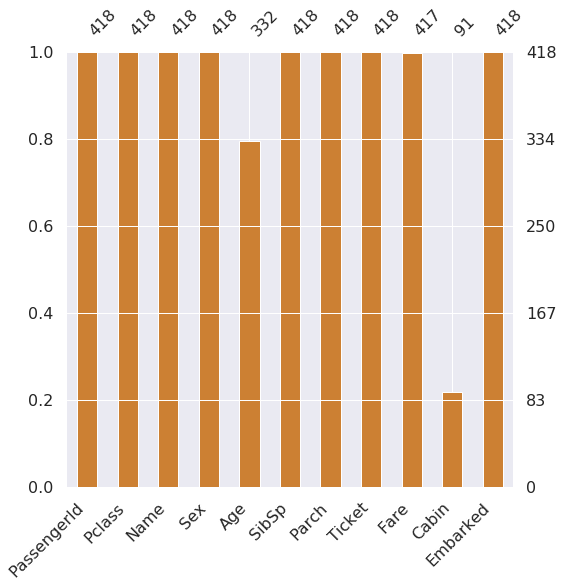

In [8]:
msno.bar(df=df_test, figsize=(8,8), color=(.8,.5,.2))

## 1.2 Target label 확인
* target label이 어떤 distribution을 갖고 있는지 확인해야 함.
* 이진 분류문제에서는 0과 1의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음.

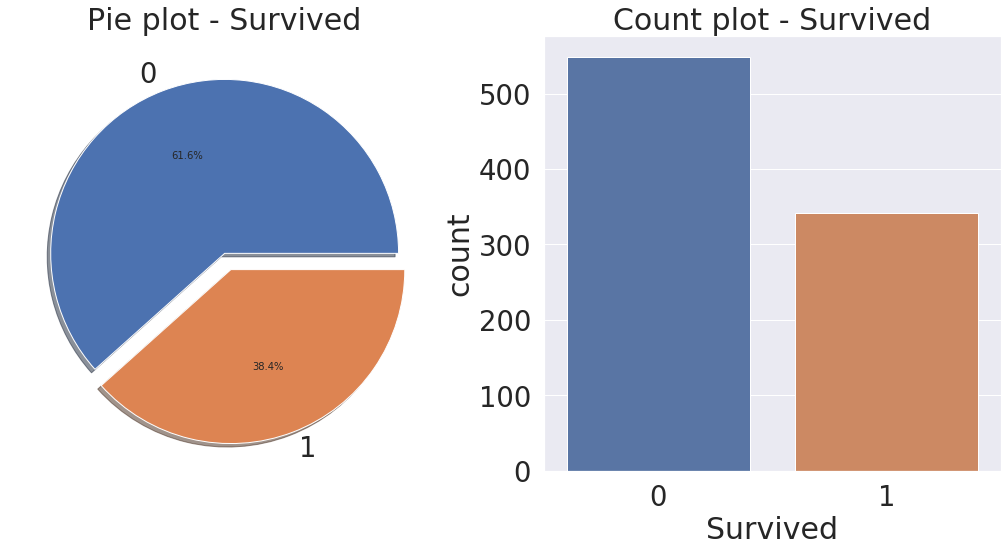

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 38.4%가 생존함.
* target label의 분포가 제법 balanced임. unbalanced일 경우 문제가 생길 수 있음.

<br>

---

<br>

# 2. Exploratory Data Analysis
* 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있음. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 좋음.<br><br>

## 2.1 Pclass
* Pclass는 서수형 데이터. 범주형이면서 순서가 있음.
* Pclass에 따른 생존률의 차이를 보려면 groupby를 사용하면 됨.
* grouped 객체에 count()를 하면 각 class에 몇 명이 있는지 알 수 있고, sum()을 하면 Survived가 1인 사람의 합을 알 수 있음.


In [10]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


* Pandas의 crosstab을 사용하면 위 내용을 더 수월하게 볼 수 있음.

In [12]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* 이진변수이고 1이 생존이므로 grouped 객체에 mean()을 하게 되면 각 클래스별 생존률을 얻을 수 있음.<br>
  class1이라면 (0 * 80 + 1 + 136) / 216 = 0.630

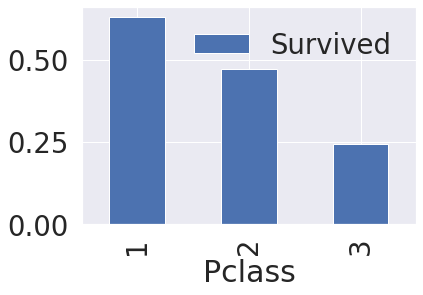

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

* Pclass가 높을수록 생존률이 높다는 것을 확인할 수 있음.
* seaborn의 countplot을 이용하면 특정 label에 따른 갯수를 확인할 수 있음.

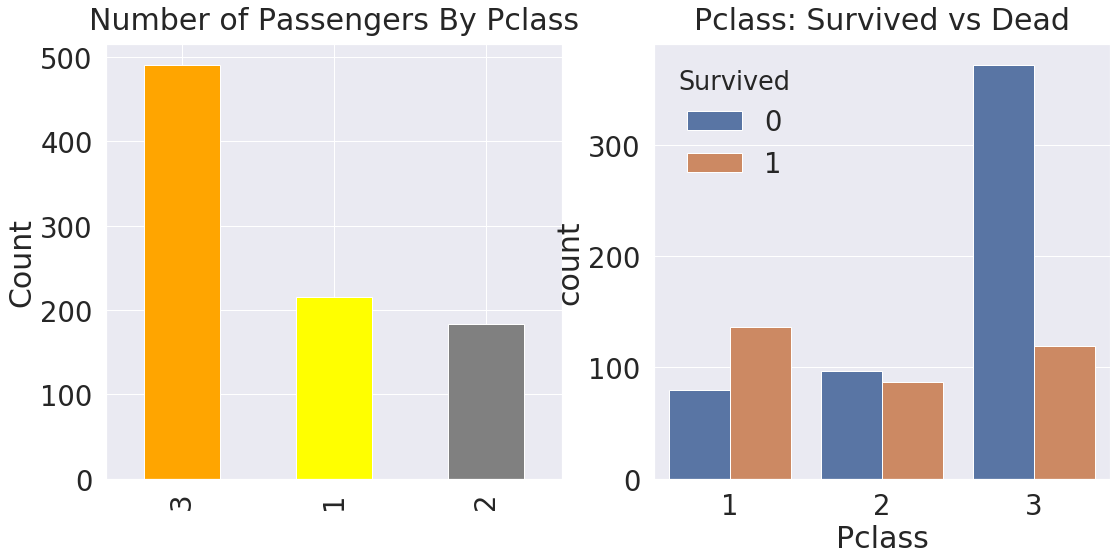

In [14]:
f,ax = plt.subplots(1,2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['orange','yellow','gray'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=1.02)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=1.02)

plt.show()

* 클래스가 높을수록 생존률이 높음을 확인할 수 있음. 즉 Pclass는 쓸만한 feature임.

<br><br>

## 2.2 Sex
* 마찬가지로 pandas groupby와 seaborn countplot으로 시각화함.

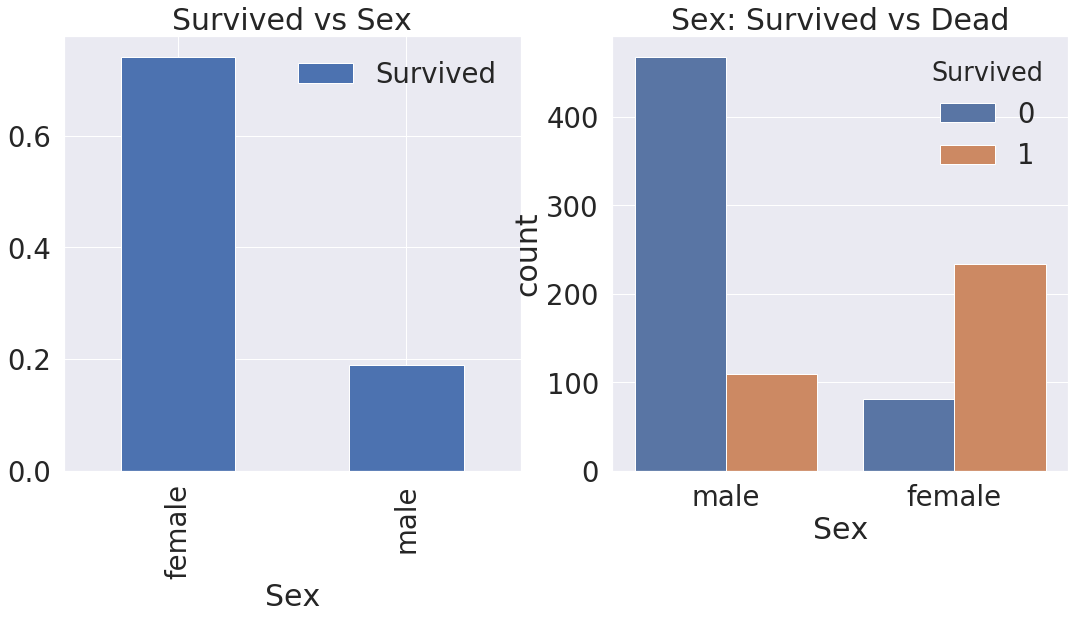

In [15]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

* 여성이 생존할 확률이 높음.

In [16]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* Pclass와 마찬가지로 Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있음.

<br><br>

## 2.3 Both Sex and Pclass
* seaborn의 factorplot을 이용하면 3차원으로 이뤄진 그래프를 그릴 수 있음.

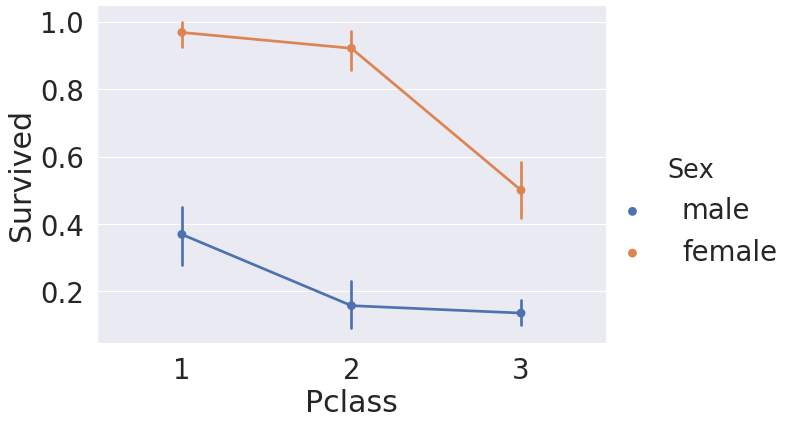

In [18]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

* 모든 클래스에서 여성의 생존률이 높은 것을 알 수 있음.
* 또한 성별 상관없이 클래스가 높을수록 살 확률이 높아짐.
* 위 그래프를 hue 대신 column으로 하면 아래와 같음.

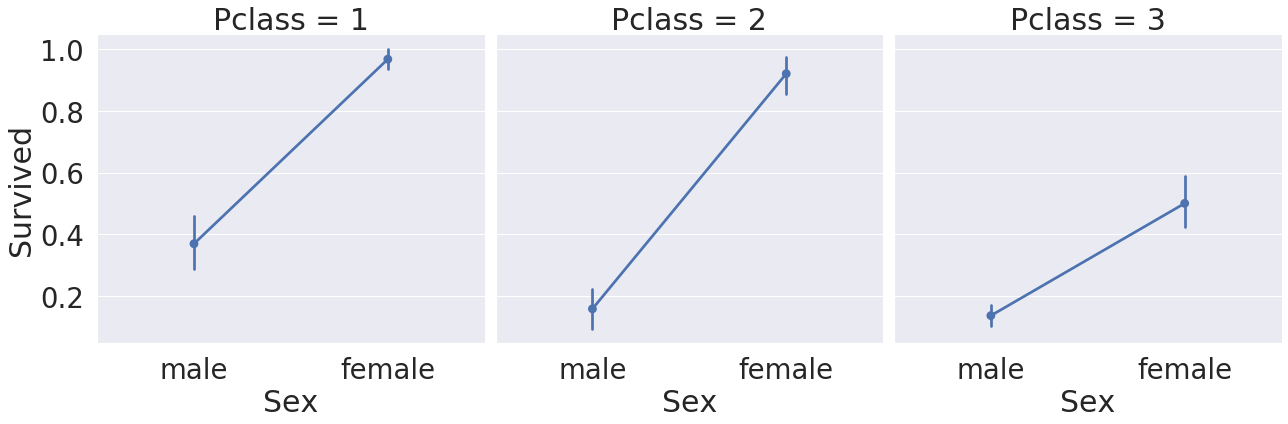

In [19]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, satureation=.5,
               size=6, aspect=1)

## 2.4 Age

In [20]:
print('제일 나이 많은 탑승객 : {:.1f}세'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f}세'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f}세'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0세
제일 어린 탑승객 : 0.4세
탑승객 평균 나이 : 29.7세


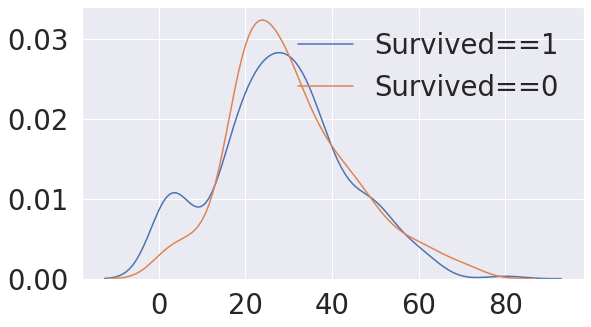

In [21]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)

plt.legend(['Survived==1', 'Survived==0'])
plt.show()

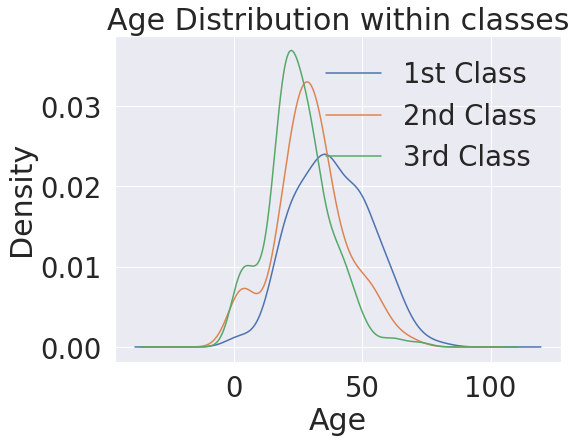

In [22]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

* Class가 높을수록 나이 많은 사람의 비중이 커짐.

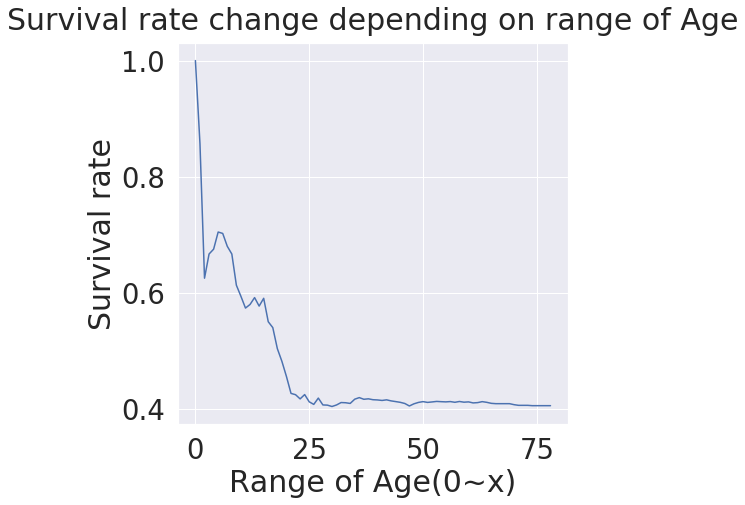

In [23]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이 범위가 넓어질수록 생존률이 급격히 떨어지는 것을 확인할 수 있음. 따라서 나이도 중요한 feature임.

<br><br>

## 2.5 Pclass, Sex, Age
* seaborn의 violineplot을 이용해 여러 정보를 한번에 표현할 수 있음.
* x축은 나눠서 보고 싶은 class(여기선 Pclass, Sex)을 나타내고 y축은 보고 싶은 distribution(Age)을 나타냄.

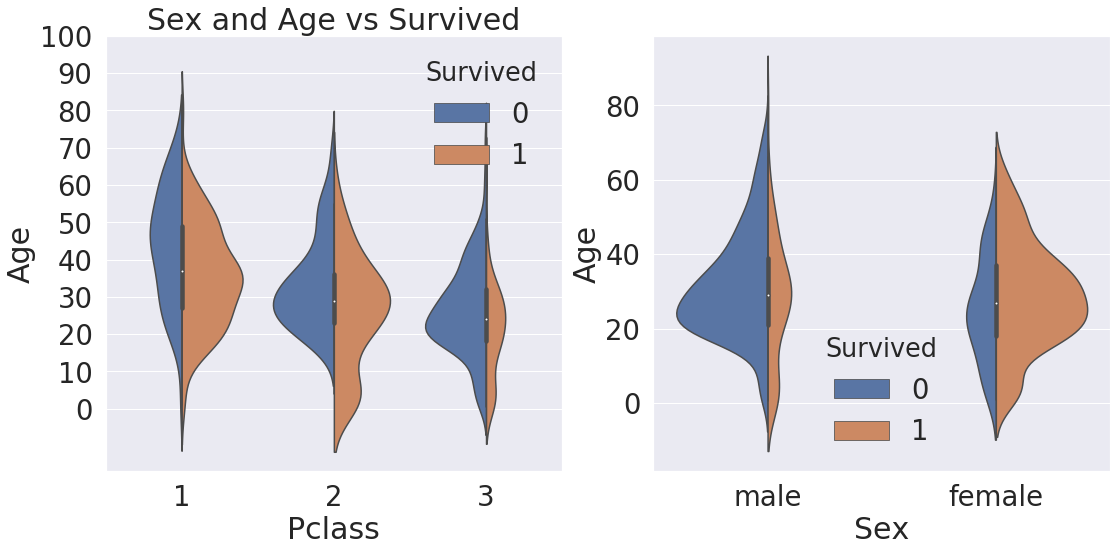

In [24]:
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[0].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

plt.show()

* 좌는 Pclass별 Age의 생존 분포, 우는 Sex별 Age의 생존 분포임.
* 모든 클래스에서 어릴수록 생존률이 높음.
* 성별을 보면 여성이 많이 생존함.

<br><br>

## 2.6 Embarked
* 탑승한 항구별 생존률을 확인함.

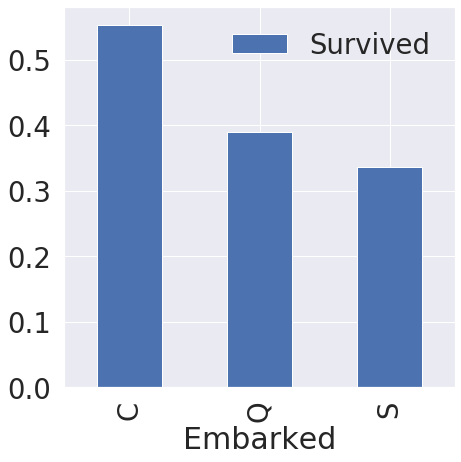

In [25]:
f,ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

* 생존률은 비슷하나 C가 그나마 높음.
* 다른 feature로 split해서 살펴봄.

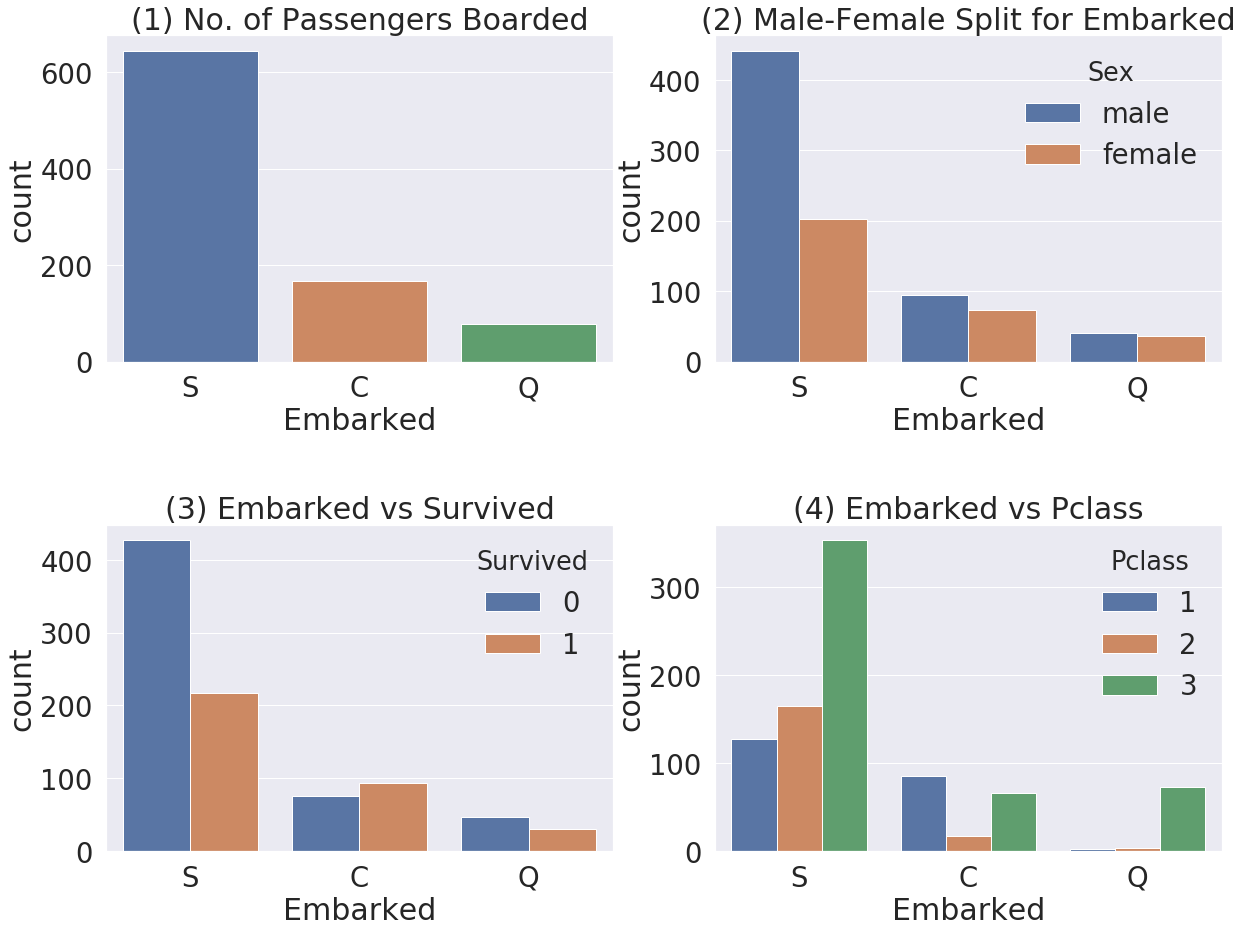

In [26]:
f,ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot("Embarked", data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot("Embarked", hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot("Embarked", hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot("Embarked", hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=.2, hspace=.5)
plt.show()

* (1) - S에서 가장 많은 사람이 탑승함.
* (2) - C, Q는 남녀 비율이 비슷하고, S는 남성 탑승자가 많음.
* (3) - S의 생존률이 가장 낮음.
* (4) - C의 생존률이 높은 이유는 높은 클래스의 사람이 많이 타서임을 확인할 수 있음. S는 3rd class가 많이 탑승하여 생존률이 낮음.

<br><br>

## 2.7 Family - SibSp + Parch
* SibSp(형제자매)와 Parch(부모자식)을 합치면 Family가 될 것임. 합쳐서 분석해봄.

In [28]:
# 자신을 포함해야 하니 1을 더함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print('FamilySize의 최대값 :',df_train['FamilySize'].max())
print('FamilySize의 최소값 :',df_train['FamilySize'].min())

FamilySize의 최대값 : 11
FamilySize의 최소값 : 1


* FamilySize와 생존의 관계를 확인.

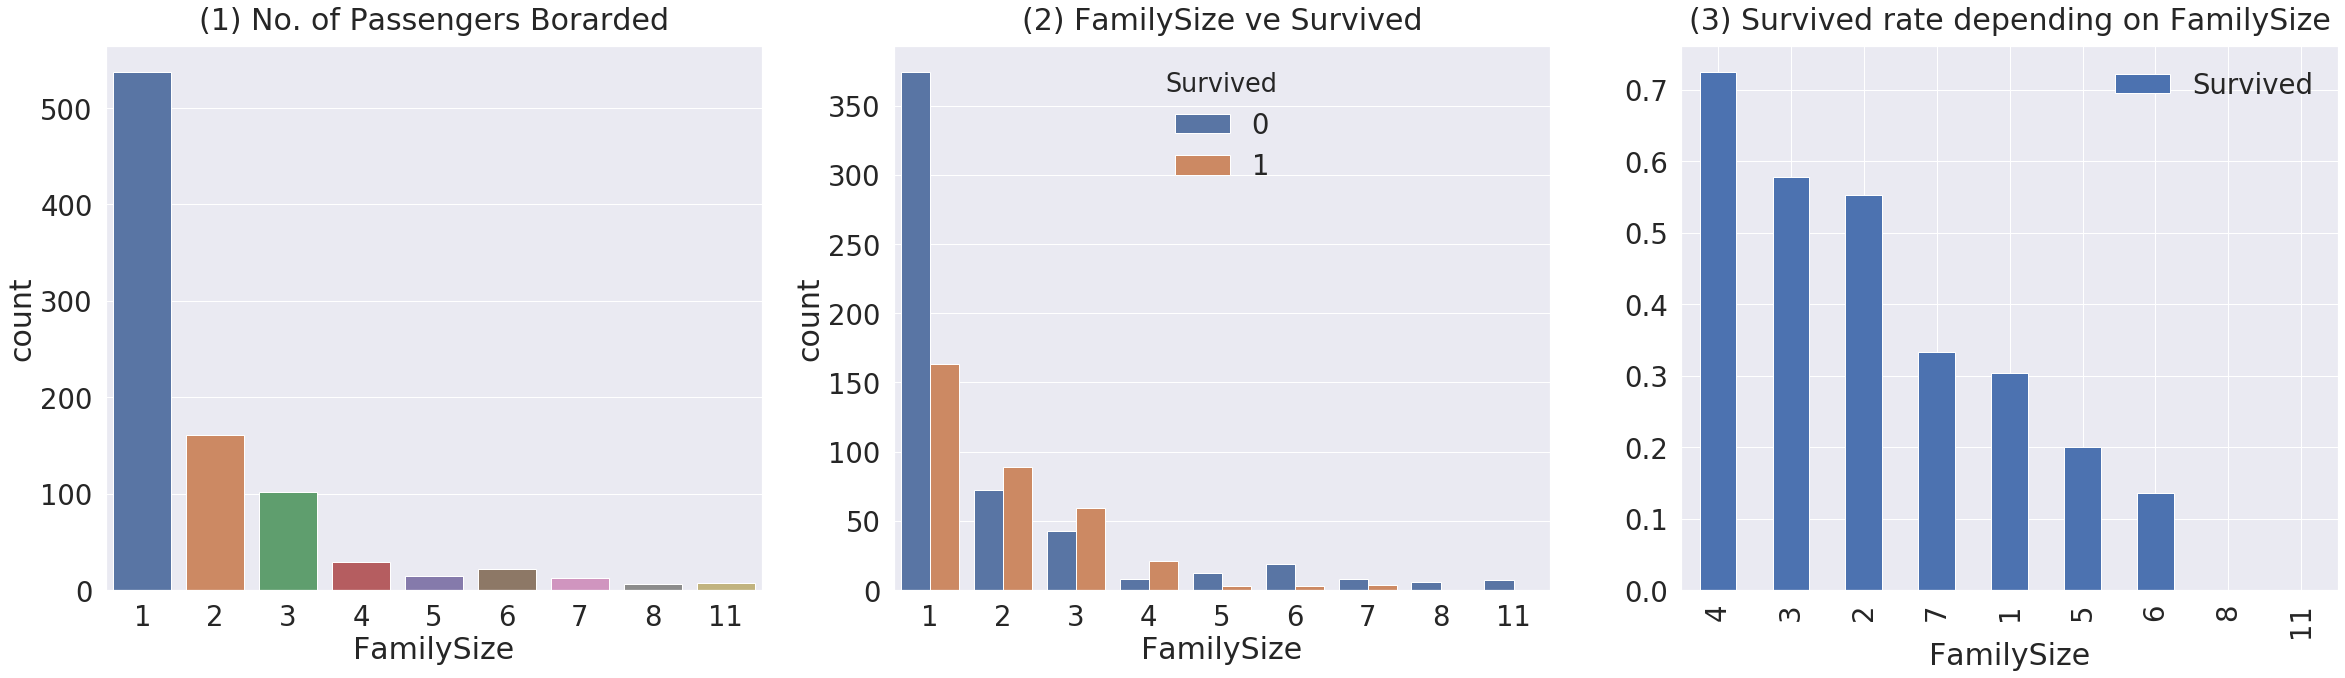

In [29]:
f,ax = plt.subplots(1,3,figsize=(40,10))

sns.countplot('FamilySize',data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Borarded', y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('(2) FamilySize ve Survived', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=.2, hspace=.5)
plt.show()

* (1) - 가족크기가 1~11까지 있음. 대부분 1명이고 그 다음으로 2, 3 4명.
* (2), (3) - 가족 크기에 따른 생존 비교. 가족이 4명인 경우가 가장 생존확률이 높음. 가족수가 많아지거나(5, 6, 7...) 너무 작아도(1) 생존확률이 낮음. 3~4명일 때 가장 생존확률이 높음.

<br><br>

## 2.8 Fare
* Fare은 탑승요금이며 연속형 변수임. 히스토그램을 그려봄.

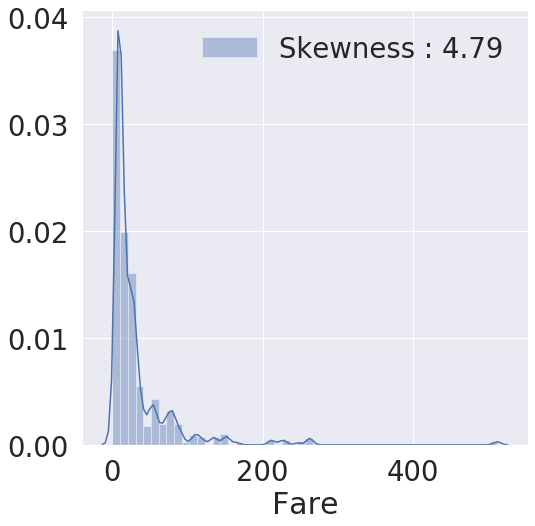

In [32]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew())).legend(loc='best')
                 # Skewness : 비대칭도

* distribution이 매우 비대칭임(high skewness). 모델이 잘못 학습할 우려가 있음. 특히 얼마 없는 outlier에 너무 민감하게 반응한다면 실제 예측 시에 좋지 못한 결과를 낳을 수 있음.
* outlier의 영향을 줄이기 위해 Fare에 log를 취함.

In [0]:
# test의 nan value를 평균값으로 치환함.
df_test.fillna(df_test['Fare'].mean(),inplace=True)

tmp_log = lambda x: np.log(x) if x > 0 else 0
df_train['Fare'] = df_train['Fare'].map(tmp_log)
df_test['Fare'] = df_test['Fare'].map(tmp_log)

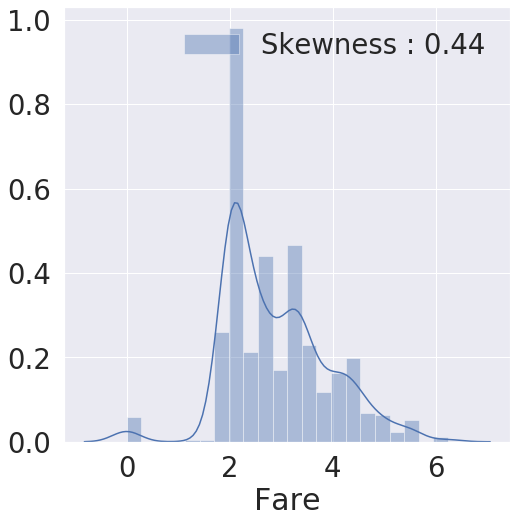

In [37]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* log를 취한 후 비대칭성이 많이 사라진 걸 확인할 수 있음.

<br><br>

## 2.9 Cabin
* 이 feature는 NaN이 대략 80%이므로 유용한 정보를 찾기 어려움. 따라서 모델에 포함시키지 않도록 함.

<br><br>

## 2.10 Ticket
* string data이므로 전처리를 거쳐야 사용 가능함. 이 커널은 튜토리얼이므로 일단 넘기도록 함.

In [38]:
df_train['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
349225      1
14973       1
111426      1
347074      1
315097      1
Name: Ticket, Length: 681, dtype: int64